Bernardo Camarena Herrera

Rodolfo Pichardini

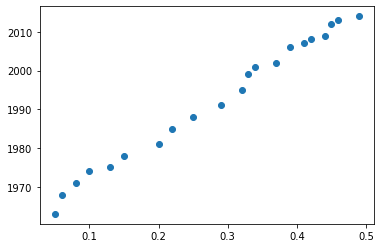

In [ ]:
import matplotlib.pyplot as plt
#data set de precio en centavos en diferentes años
x = [0.05, 0.25, 0.42, 0.06, 0.29, 0.44, 0.08, 0.32, 0.45, .10, .33,.46,.13,.34,.49,.15,.37,.20,.39,.22,.41]
y = [1963, 1988,2008,1968,1991,2009,1971,1995,2012,1974,1999,2013,1975,2001,2014,1978,2002,1981,2006,1985,2007]

plt.scatter(x, y)
plt.show()

In [ ]:
#Esta gráfica demuestra la relacion de precio de centavos con el tiempo, podemos ver que conforme pasan los años, aumenta el precio.
import numpy as np
barx = np.mean(x) 
bary = np.mean(y) 

print(barx, bary) 

0.2833333333333333 1992.3809523809523


In [ ]:
varx = np.var(x, ddof=1) #varianza muestral
covxy= np.cov(x,y, ddof=1) #covarianza muestral

varx, covxy 

(0.020963333333333334, array([[2.09633333e-02, 2.36516667e+00],
        [2.36516667e+00, 2.69047619e+02]]))

In [ ]:
beta1 = covxy/varx
beta0=bary-beta1*barx
#se saca beta 1 y beta 0 que son necesarios para el tema de prediccion
print(beta0, beta1)

[[ 1992.09761905  1960.41415851]
 [ 1960.41415851 -1643.97580053]] [[1.00000000e+00 1.12823978e+02]
 [1.12823978e+02 1.28342003e+04]]


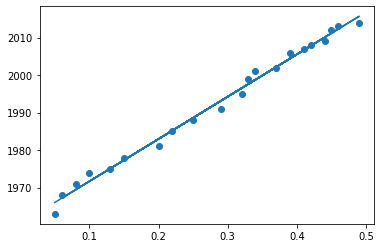

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err= stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
#tenemos esta grafica que ahora tiene una recta que está en medio de todos los puntos, esto se logró disminuyendo la distancia de los puntos a la recta.


In [ ]:
r #r es una medida (coeficiente de determinacion) que indica que tan buen modelo es el ajustado

0.9959029140154058

In [ ]:
s = myfunc(.56)
#AQUI ESTAMOS LLAMANDO LA FUNCION QUE VA A PREDECIR Y NOS REGRESARÁ EL VALOR PREDECIDO. 
print(s)

2023.5955863980191


Ahora vamos a hacerlo con la base de datos de salarios de data science

In [ ]:
#importamos la base de datos y la hacemos un data frame de pandas

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


vamos a hacer la relacion de los puestos de data science con el salario en USD. Así podemos predecir una cantidad de dinero que queramos ganar segun el puesto que tengamos?

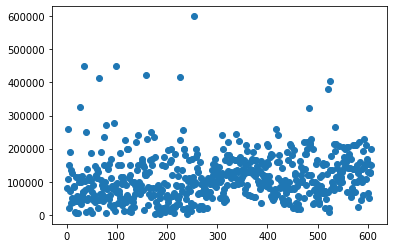

In [ ]:
x = data.job_title.index.values+1
y = data.salary_in_usd.values
plt.scatter(x, y)
plt.show()
#aqui estamos mostrando en un scatter plot de todos nuestros datos, son todos los puestos relacionado con sus salarios en USD

In [ ]:
barx = np.mean(x) 
bary = np.mean(y) 
#definimos el promedio de eje x y y (proceso de la regresion lineal)

In [ ]:
varx = np.var(x, ddof=1) #varianza muestral
covxy= np.cov(x,y, ddof=1) #covarianza muestral

varx, covxy 

(30754.666666666668, array([[3.07546667e+04, 2.07841838e+06],
        [2.07841838e+06, 5.03493266e+09]]))

In [ ]:
beta1 = covxy/varx
beta0=bary-beta1*barx
#esto es beta 0 y beta 1 que son parte de la prediccion
print(beta0, beta1)

[[   111993.86985173     91753.3718988 ]
 [    91753.3718988  -49656394.0231575 ]] [[1.00000000e+00 6.75805854e+01]
 [6.75805854e+01 1.63712802e+05]]


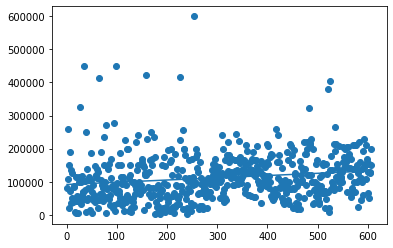

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err= stats.linregress(x, y)
#creamos una funcion con la formula de la recta que regrese el valor predecido
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
#aqui ya tenemos la grafica de la recta generada estando en la mitad de los datos, lo cual nos predecirá datos que esten en esta recta.

In [ ]:
r #r es una medida (coeficiente de determinacion) que indica que tan buen modelo es el ajustado

0.1670246721807668

In [ ]:
data[data.job_title.index.values==200]
#aqui insertamos el numero que queramos predecir, por ejemplo el index 200, que es el puesto de un Data Scientist

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
200,200,2021,MI,FT,Data Scientist,52000,EUR,61467,DE,50,AT,M


In [ ]:
s = myfunc(200)
#llamamos la funcion e insertamos el valor que queramos predecir, en este caso, el puesto de Data Science.
print(s)

105269.48897309744


Aqui podemos predecir que un Data scientist ganaria 105,269 dolares.

Con esto podemos concluir que la regresion lineal efectivamente sirve para predecir valores, teniendo variables responsivas y un set de datos que podemos relacionar, podemos predecir precios, salarios, temperaturas, etc. Como en este caso, predecimos el salario de un data scientist. Esto nos puede servir mucho en la vida para predecir tendencias, como por ejemplo la cantidad vendida de productos de AI, la tendencia de usuarios que compren en diferentes sitios web, etc.


